Import Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Load The Data File

In [7]:
# Upload the file
uploaded = files.upload()

# Assuming your data is space-separated
data = pd.read_csv('20150317_IMF.txt', delim_whitespace=True)

# Display the first few rows of the dataframe
data.head()

Saving 20150317_IMF.txt to 20150317_IMF (4).txt


,2015,3,17,0,0.1,0.2,0.3,-4.41,-0.319,6.176,-422.716,13.163,-5.809,12.914,43258.2
0,2015,3,17,0,1,0,0,-5.806,1.889,3.172,-424.477,13.284,-6.566,13.739,48578.2
1,2015,3,17,0,2,0,0,-4.676,0.993,3.516,-425.209,13.942,-7.464,14.300,50250.6
2,2015,3,17,0,3,0,0,-0.786,-1.286,3.452,-423.648,11.620,-7.396,13.131,51434.1
3,2015,3,17,0,4,0,0,-1.126,-1.047,3.588,-420.696,10.522,-8.494,13.185,61187.0
4,2015,3,17,0,5,0,0,-1.466,-0.808,3.724,-417.745,9.424,-9.592,13.240,70939.9


Normalize the data and split it into training and testing sets

In [8]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

Build the Autoencoder Model

In [9]:
input_dim = X_train.shape[1]
encoding_dim = 32  # You can adjust this

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 15)                495       
                                                                 
Total params: 1007 (3.93 KB)
Trainable params: 1007 (3.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the Autoencoder

In [10]:
epochs = 50
batch_size = 32

history = autoencoder.fit(X_train, X_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test))


Epoch 1/50
72/72 [==============================] - 1s 4ms/step - loss: 0.1006 - val_loss: 0.0683
Epoch 2/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0458 - val_loss: 0.0346
Epoch 3/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.0267
Epoch 4/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0205
Epoch 5/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0152
Epoch 6/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0115
Epoch 7/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 8/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 9/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 10/50
72/72 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 11/50
72/72 [

Evaluate the Model

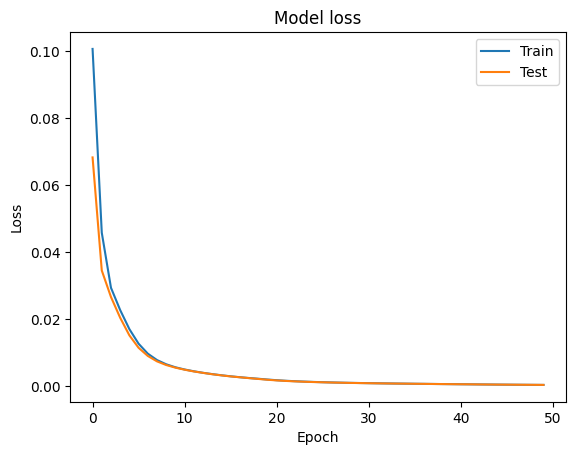

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Use the Encoder for Dimensionality Reduction

In [12]:
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(X_test)

print(encoded_data)


18/18 [==============================] - 0s 1ms/step
[[1.6953832  0.         0.9805941  ... 0.         1.3800231  0.47622252]
 [1.5477914  0.         1.4320438  ... 0.11318399 0.20395407 0.        ]
 [1.2843504  0.         1.7070508  ... 0.         0.22774446 0.14575566]
 ...
 [0.6047263  0.         1.9406903  ... 0.         0.         0.        ]
 [1.888956   0.         0.37893584 ... 0.         0.7568507  0.6398034 ]
 [1.0116936  0.         1.6652515  ... 0.09549934 0.         0.197119  ]]
